In [112]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from pandas import DataFrame
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
import warnings
warnings.filterwarnings('ignore')

In [113]:
raw = pd.read_csv('accident/Allegheny County Crash Data.csv')
pd.set_option('display.max_columns', 200)
crashs = raw[['COLLISION_TYPE','DAY_OF_WEEK','VEHICLE_COUNT','FATAL_OR_MAJ_INJ','AGGRESSIVE_DRIVING','DISTRACTED','DRINKING_DRIVER','HVY_TRUCK_RELATED','INTERSECTION','ICY_ROAD','WET_ROAD','SNOW_SLUSH_ROAD','SPEEDING_RELATED','UNBELTED','FIRE_IN_VEHICLE','CELL_PHONE','ILLUMINATION']]
crashs['COLLISION_TYPE'] = crashs['COLLISION_TYPE'].map({0.0:'Not Collision',1.0:'Rear-End',2.0:'Head-On',3.0:'Rear-to-Rear',4.0:'Angle',5:'Sideswipe',6:'Sideswipe',7:'Hit Fixed Object',8:'Hit Pedestrian',9.0:'Unknown'})
crashs['ILLUMINATION'] = crashs['ILLUMINATION'].map({1.0:'Daylight',2:'Dark,no street lights',3:'Dark',4:'Dusk',5:'Dawn', 6:'Dark',8.0:'Not Report',9.0:'Not Report'})
crashs['DAY_OF_WEEK']= crashs['DAY_OF_WEEK'].map({1:'Weekend',7:'Weekend',2:'Weekday',3:'Weekday',4:'Weekday',5:'Weekday',6:'Weekday'})

crashs.head()

,COLLISION_TYPE,DAY_OF_WEEK,VEHICLE_COUNT,FATAL_OR_MAJ_INJ,AGGRESSIVE_DRIVING,DISTRACTED,DRINKING_DRIVER,HVY_TRUCK_RELATED,INTERSECTION,ICY_ROAD,WET_ROAD,SNOW_SLUSH_ROAD,SPEEDING_RELATED,UNBELTED,FIRE_IN_VEHICLE,CELL_PHONE,ILLUMINATION
0,Hit Fixed Object,Weekday,1,0,0,1,1,0,0,0,0,0,0,1,0,0,"Dark,no street lights"
1,Hit Fixed Object,Weekday,1,0,0,0,0,0,0,1,0,0,0,0,0,0,Daylight
2,Hit Fixed Object,Weekday,1,0,1,0,0,0,1,0,0,0,0,0,0,0,"Dark,no street lights"
3,Angle,Weekday,2,0,1,0,0,1,1,0,1,0,0,0,0,0,Daylight
4,Rear-End,Weekday,2,0,0,0,0,0,0,0,0,0,0,0,0,0,Dark


In [114]:
#EXPLORE FATALITY
crashs['FATAL_OR_MAJ_INJ'].value_counts()

0    154016
1      3805
Name: FATAL_OR_MAJ_INJ, dtype: int64

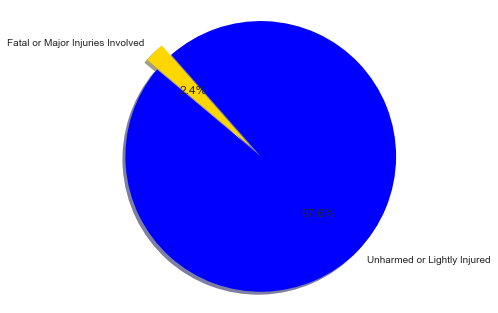

In [115]:
labels = 'Unharmed or Lightly Injured', 'Fatal or Major Injuries Involved'
colors = [ 'blue','gold']
explode = (0.1, 0)  # explode 1st slice
sizes = [crashs.loc[crashs.FATAL_OR_MAJ_INJ == 0, 'FATAL_OR_MAJ_INJ'].count(),crashs.loc[crashs.FATAL_OR_MAJ_INJ == 1, 'FATAL_OR_MAJ_INJ'].count()]
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()
# sns.countplot(x='FATAL_OR_MAJ_INJ',data=crashs)
# plt.show()

## Create dummy variables

**Countinous variables**:<br/>
VEHICLE_COUNT<br/>

**Non-dummy catagorical variables**:<br/>
COLLISION_TYPE<br/>
DAY_OF_WEEK<br/>
ILLUMINATION<br/>
**Dummy Catagorical variables**:<br/>
FATAL<br/>
AGGRESSIVE_DRIVING<br/>
DISTRACTED<br/>
DRINKING_DRIVER<br/>
HVY_TRUCK_RELATED<br/>
INTERSECTION<br/>
ICY_ROAD<br/>
WET_ROAD<br/>
SNOW_SLUSH_ROAD<br/>
ILLUMINATION_DARK<br/>
SPEEDING_RELATED<br/>
UNBELTED<br/>
FIRE_IN_VEHICLE<br/>
CELL_PHONE

In [116]:
Collision_dummy = pd.get_dummies(crashs['COLLISION_TYPE'], prefix=['Coll'])
Weekday_dummy = pd.get_dummies(crashs['DAY_OF_WEEK'], prefix=['Weekday'])
ILLUMINATION_dummy =pd.get_dummies(crashs['ILLUMINATION'],prefix=['ILLUMINATION'])
crashs_reg = pd.concat([crashs, Collision_dummy,Weekday_dummy,ILLUMINATION_dummy], axis=1).drop(['COLLISION_TYPE','DAY_OF_WEEK','ILLUMINATION'],axis=1)
crashs_reg.head()

,VEHICLE_COUNT,FATAL_OR_MAJ_INJ,AGGRESSIVE_DRIVING,DISTRACTED,DRINKING_DRIVER,HVY_TRUCK_RELATED,INTERSECTION,ICY_ROAD,WET_ROAD,SNOW_SLUSH_ROAD,SPEEDING_RELATED,UNBELTED,FIRE_IN_VEHICLE,CELL_PHONE,['Coll']_Angle,['Coll']_Head-On,['Coll']_Hit Fixed Object,['Coll']_Hit Pedestrian,['Coll']_Not Collision,['Coll']_Rear-End,['Coll']_Rear-to-Rear,['Coll']_Sideswipe,['Coll']_Unknown,['Weekday']_Weekday,['Weekday']_Weekend,['ILLUMINATION']_Dark,"['ILLUMINATION']_Dark,no street lights",['ILLUMINATION']_Dawn,['ILLUMINATION']_Daylight,['ILLUMINATION']_Dusk,['ILLUMINATION']_Not Report
0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0
2,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,2,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
4,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0


In [117]:
import statsmodels.api as sm
y = crashs_reg['FATAL_OR_MAJ_INJ']
#drop some of the catogorical variable to aviod multi-colinnearity
X = crashs_reg.drop(['FATAL_OR_MAJ_INJ',"['Coll']_Unknown","['ILLUMINATION']_Not Report","['Weekday']_Weekend"],axis=1)
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.101272
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:       FATAL_OR_MAJ_INJ   No. Observations:               157821
Model:                          Logit   Df Residuals:                   157794
Method:                           MLE   Df Model:                           26
Date:                Sat, 02 Dec 2017   Pseudo R-squ.:                  0.1087
Time:                        17:46:29   Log-Likelihood:                -15983.
converged:                       True   LL-Null:                       -17933.
                                        LLR p-value:                     0.000
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
VEHICLE_COUNT                             -0.0001   

In [118]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.975
